In [161]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from time import sleep

# Scenario

Winter is here! GoT Season 8 kicked off today :D The cultural committee has decided to host weekly screenings of the episodes! However, as the season progresses, they are having trouble deciding on a room to house the audience as the numbers are uncertain because of the endems :'(

The screenings typincally happen in the mornings and some people think that if a lot of people have a deadline on the same night, the turnout will be low.

Given the turnout for the last 10 episodes and the number of people who had an exam or a deadline on the same day, can you help them decide what will be the turnout for the 11th episode?


# Setting up a hypothesis

To predict anything about the turnout, we need to have certain assumptions about turnout. And these assumptions depend a lot upon the data that we have at hand. 

## Properties of the data (in our case)

- We have just one piece of information or "feature" (number of students with a deadline on the same day)
- We want to predict the turnout, i.e., a quantity that will lie in the interval $[0, \infty)$

What we want to learn is a __relationship__ between the data that we have and turnout. The relationship would then map our feature to the target value!

To arrive at this relationship, we need to start off with an assumption or __hypothesis__. 

How do we decide what this hypothesis will be? In order to do that, let us first see how our data looks like...

# Data: Exploratory Analysis

In [162]:
num_of_days = 14
students_with_deadline = np.array( [600, 450, 700, 540, 400, 410, 300, 650, 150, 250, 350, 200, 500, 800], dtype=np.float64 )
turnout = np.array([1400, 2000, 1100, 2000, 2500, 2200, 2900, 1400, 3950, 3000, 2850, 3500, 2000, 725], dtype=np.float64 )

In [163]:
df = pd.DataFrame({"Students with Deadline on Day i": students_with_deadline, "Turnout on Day i": turnout})
df

,Students with Deadline on Day i,Turnout on Day i
0,600.0,1400.0
1,450.0,2000.0
2,700.0,1100.0
3,540.0,2000.0
4,400.0,2500.0
5,410.0,2200.0
6,300.0,2900.0
7,650.0,1400.0
8,150.0,3950.0
9,250.0,3000.0


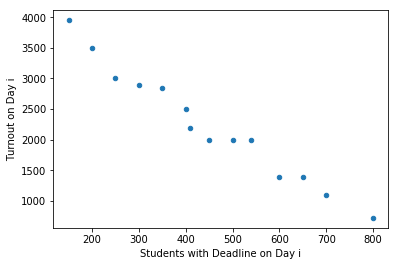

In [164]:
df.plot.scatter("Students with Deadline on Day i", "Turnout on Day i")
plt.show()

What sort of function do you think would work best here?

TLDR we are going to try and find a linear function to pass through most, if not all of these points.

### That's Linear Regression!

We essentially want to try and exploit the __linear__ property of the data to see if we can find a suitable line that approximates the actual relationship between our data and the result

# Setting up the machinery

Let us say that our hypothesis is given by:

$$f(x) = \theta_0 + \theta_1x$$

Here, $x$ represents the number of students with a deadline. What we ideally want is that our $y$, the turnout is exactly equal to $f(x)$.

We need some way to express the difference in our hypothesis and the target value.

## Question: What could be a good way to represent this difference?

# Mean Squared Error



We define our way to represent the error in our hypothesis as follows:

$$J(\theta) = \frac{1}{2m}\sum_{i = 0}^{m}(y_i - f_\theta(x_i))^2$$

Specifically,

$$J(\theta) = \frac{1}{2m}\sum_{i = 0}^{m}(y_i - \theta_0 - \theta_1x_i)^2$$

where $
  \theta=
  \left[ {\begin{array}{c}
   \theta_0\\
   \theta_1\\
  \end{array} } \right]
$

What we want to do is __minimize__ this error function. But let's answer some questions first!

- Why is $J(.)$ a function of $\theta$ and not $x$?
- How would you go about minimizing it? (__Hint__: Go back to high-school math)
- Why did we take $2m$ in the denominator instead of $m$ if we needed mean? (__Hint__: What would minimization lead to?)

# Gradient Descent

This is what forms the bread and butter of all of ML/DL world.

Quite simply put, gradient descent is:

```
repeat until convergence {

    calculate_cost_function()

    for all parameters {

        update parameter towards optima

    }
}
```


## Specifics 

We know what we want to minimize w.r.t., so let's get going!

Derivative w.r.t $\theta_0$:

$$\frac{\partial J(\theta)}{\partial \theta_0} = -\frac{1}{m} \sum_{i=0}^{m}(y_i - \theta_0 - \theta_1x_i) $$

#### Try the derivative w.r.t. $\theta_1$!


Now, what we want to try and do is move in the direction of the gradient. (Why?)

How do we update the parameters?

- $\theta_0 = \theta_0 + \alpha * \frac{\partial J(\theta)}{\partial \theta_0}$
- $\theta_1 = \theta_1 + \alpha * \frac{\partial J(\theta)}{\partial \theta_1}$

What is $\alpha$? How do you get its value?




In [165]:
# Preprocessing the data

# scaler = StandardScaler()
# data = np.vstack((students_with_deadline, turnout)).T
# scaler.fit(data)
# data = scaler.transform(data)
# data
# students_with_deadline = data[:, 0]
# turnout = data[:, 1]

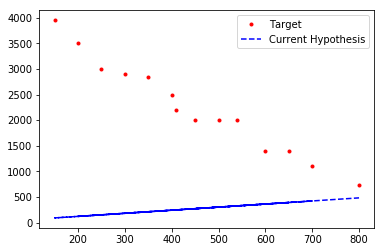

In [166]:
# Now towards the implementation!

theta = np.random.random(2) # initialised some paramters

y_hat = theta[0] + theta[1] * students_with_deadline

plt.plot(students_with_deadline, turnout, 'r.', label = 'Training set')
plt.plot(students_with_deadline, y_hat, 'b--', label = 'Current hypothesis')
plt.legend(["Target", "Current Hypothesis"])
plt.show()

Cost function:  2015413102335026.8


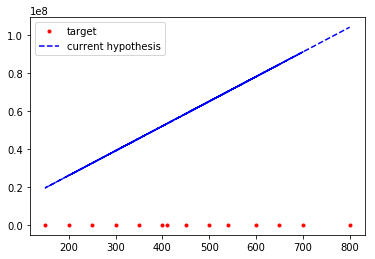

Cost function:  9.326083955949737e+24


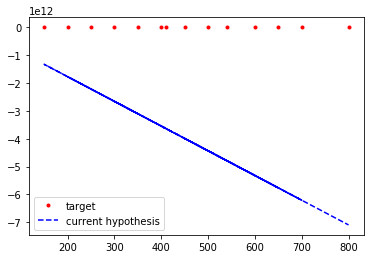

Cost function:  4.315473004255951e+34


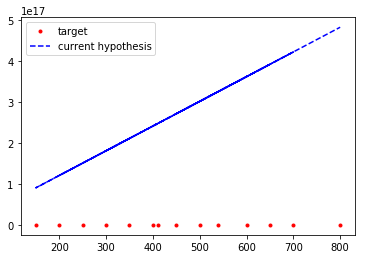

Cost function:  1.9969053829895403e+44


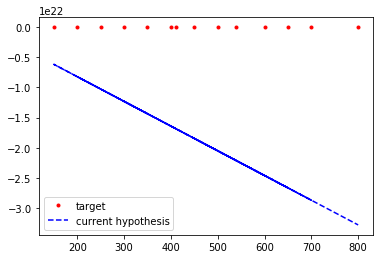

Cost function:  9.240310632646666e+53


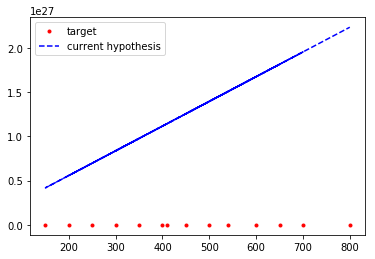

In [167]:
total_epochs = 5 # Gotta stop sometime :)
alpha = 0.5      # Learning rate
m = students_with_deadline.shape[0]
X = students_with_deadline.copy()
y = turnout.copy()
for i in range(total_epochs):
    
    #calculate new theta
    theta[0] = theta[0] - alpha * (-1 * (1 / m) * np.sum(y - theta[0] - theta[1] * X))
    theta[1] = theta[1] - alpha * (-1 * (1 / m) * np.dot(X, y - theta[0] - theta[1] * X))

    #compute new loss
    loss = (1 / (2*m)) * np.sum(np.power(y - theta[0] - theta[1] * X, 2))
    y_hat = theta[0] + theta[1] * X
    print("Cost function: ", loss)

    #plot
    plt.plot(X, turnout, 'r.', label = 'target')
    plt.plot(X, y_hat, 'b--', label = 'current hypothesis')
    plt.legend()
    plt.show()

    sleep(3)

# So much code? :0

Precisely not! We discussed all this just so that you know what happens under the hood. Now let us see how sci-kit learn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model simplifies things for us!

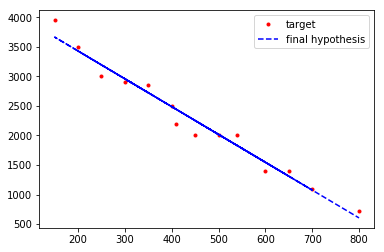

In [168]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
plt.plot(X, y, 'r.', label = 'target')
plt.plot(X, lr.predict(X.reshape(-1, 1)), 'b--', label = 'final hypothesis')
plt.legend()
plt.show()


# Resources

- http://cs229.stanford.edu/syllabus.html You should be able to handle portion till pset1 :)
- If you want to challenge yourself:
    - https://www.youtube.com/watch?v=mbyG85GZ0PI&list=PLD63A284B7615313A
    
## See you at the Kaggle challenge! (More details at the end of session)



#### Feel free to ping me at: aditya16217@iiitd.ac.in